# Process Renovar PM10 Data according to reference station

## Constants and imports

In [1]:
input_data_directory = 'input/'
sensor_data_path = input_data_directory + 'alpha_pm_10_concsensor_dataframe_1hr.csv'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Material Particulado <10µm'

## Load Alphasense CO sensor data

In [2]:
import pandas as pd

sensor_data = pd.read_csv(sensor_data_path).sort_values(by='DateTime', ascending=True)
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-23 11:30:00,-28.456899,-48.972999,4.126667,-0.375000,4.126667,11,3,1.189384,75.0,GTQTLE99,0.060000,4.126667
2022-11-23 12:30:00,-28.456899,-48.972999,2.580000,-0.345000,2.580000,12,4,0.710446,100.0,VALID,0.120000,3.336667
2022-11-23 13:30:00,-28.456899,-48.972999,2.456667,-0.236667,2.456667,13,3,1.259577,75.0,VALID,0.066667,6.660000
2022-11-23 14:30:00,-28.456899,-48.972999,1.027500,0.120000,1.027500,14,4,0.183553,100.0,VALID,0.122500,8.665000
2022-11-23 15:30:00,-28.456899,-48.972999,1.467500,0.065000,1.467500,15,4,0.072744,100.0,VALID,0.050000,5.662500
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 16:30:00,-28.456899,-48.972999,0.330000,5000.145000,0.330000,16,2,0.042426,50.0,LOWSAMPLES,0.066667,7.156667
2023-04-21 17:30:00,-28.456899,-48.972999,0.480000,0.180000,0.480000,17,1,NaN,25.0,LOWSAMPLES,0.066667,13.020000
2023-04-21 18:30:00,-28.456899,-48.972999,0.430000,10000.420000,0.430000,18,2,0.113137,50.0,LOWSAMPLES,0.266667,6.195000


## Load reference sensor data

In [3]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path).sort_values(by='DateTime', ascending=True)
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]
reference_data.head()

DateTime
2022-01-01 02:30:00    31.0
2022-01-01 03:30:00    37.0
2022-01-01 04:30:00    22.0
2022-01-01 05:30:00    16.0
2022-01-01 06:30:00    16.0
Name: Material Particulado <10µm, dtype: float64

### Select period of interest according to PM10 sensor data

In [4]:
reference_data = reference_data[reference_data.index >= sensor_data.index[0]]
reference_data = reference_data[reference_data.index <= sensor_data.index[-1]]
reference_data

DateTime
2022-11-23 11:30:00    19.0
2022-11-23 12:30:00    20.0
2022-11-23 13:30:00    23.0
2022-11-23 14:30:00    23.0
2022-11-23 15:30:00    23.0
                       ... 
2023-02-08 12:30:00    31.0
2023-02-08 13:30:00    26.0
2023-02-08 14:30:00    25.0
2023-02-08 15:30:00    33.0
2023-02-08 16:30:00     NaN
Name: Material Particulado <10µm, Length: 1854, dtype: float64

## Append reference column to PM10 sensor Data

In [5]:
sensor_data['reference'] = reference_data
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99,reference
DateTime,,,,,,,,,,,,,
2022-11-23 11:30:00,-28.456899,-48.972999,4.126667,-0.375000,4.126667,11,3,1.189384,75.0,GTQTLE99,0.060000,4.126667,19.0
2022-11-23 12:30:00,-28.456899,-48.972999,2.580000,-0.345000,2.580000,12,4,0.710446,100.0,VALID,0.120000,3.336667,20.0
2022-11-23 13:30:00,-28.456899,-48.972999,2.456667,-0.236667,2.456667,13,3,1.259577,75.0,VALID,0.066667,6.660000,23.0
2022-11-23 14:30:00,-28.456899,-48.972999,1.027500,0.120000,1.027500,14,4,0.183553,100.0,VALID,0.122500,8.665000,23.0
2022-11-23 15:30:00,-28.456899,-48.972999,1.467500,0.065000,1.467500,15,4,0.072744,100.0,VALID,0.050000,5.662500,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 16:30:00,-28.456899,-48.972999,0.330000,5000.145000,0.330000,16,2,0.042426,50.0,LOWSAMPLES,0.066667,7.156667,NaN
2023-04-21 17:30:00,-28.456899,-48.972999,0.480000,0.180000,0.480000,17,1,NaN,25.0,LOWSAMPLES,0.066667,13.020000,NaN
2023-04-21 18:30:00,-28.456899,-48.972999,0.430000,10000.420000,0.430000,18,2,0.113137,50.0,LOWSAMPLES,0.266667,6.195000,NaN


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

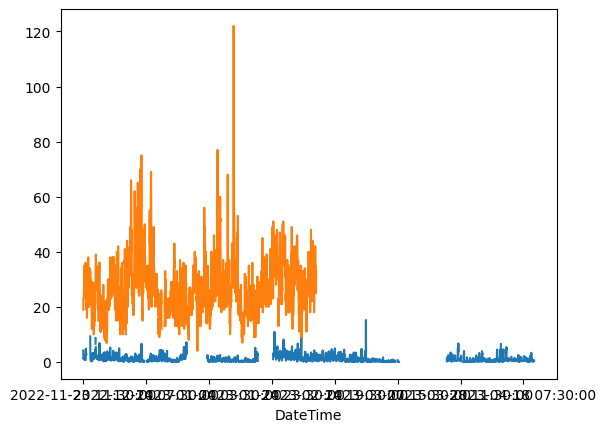

In [6]:
sensor_data['value'].plot()
sensor_data['reference'].plot()

## Separate reference data and valid sensor data

In [8]:
data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]
data

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_16513/1722251259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]


,value,reference
DateTime,,
2022-11-23 12:30:00,2.580000,20.0
2022-11-23 13:30:00,2.456667,23.0
2022-11-23 14:30:00,1.027500,23.0
2022-11-23 15:30:00,1.467500,23.0
2022-11-23 16:30:00,1.325000,23.0
...,...,...
2023-02-08 12:30:00,1.292500,31.0
2023-02-08 13:30:00,1.492500,26.0
2023-02-08 14:30:00,1.917500,25.0


## Plot sensor vs. reference

Spearmans correlation coefficient: 0.255
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.255
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.174, p<0.05")

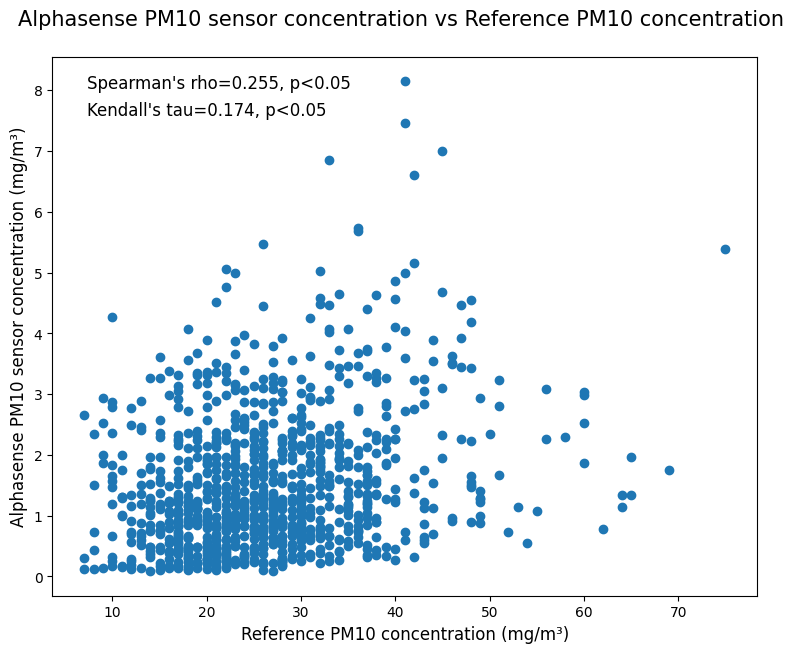

In [9]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(data['reference'], data['value'])
plt.title('Alphasense PM10 sensor concentration vs Reference PM10 concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference PM10 concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense PM10 sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(data['reference'], data['value'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( data['reference'], data['value'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)